| **Chapter**                   | 2:  Simple compartmental models              |
| ----------------------------- |----------------------------------------------|
| **Computational Note**        | 2.11: Symbolic determination of MGF          |
| **Package prerequisites**     | [SymPy](https://www.sympy.org/en/index.html) |

# Symbolic determination of MGF

In [1]:
from scipy import optimize
import sympy
from sympy import E
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

sympy.init_printing()

In [1]:
%load_ext watermark
%watermark --iversions -v -a "Chris von Csefalvay" -gu "chrisvoncsefalvay" -p sympy -p scipy

Author: Chris von Csefalvay

Github username: chrisvoncsefalvay

Python implementation: CPython
Python version       : 3.10.2
IPython version      : 8.4.0

scipy: 1.8.1



In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv",
                          usecols=["date", "cases"],
                          dtype={"date": str, "cases": int})

In [3]:
data["cases"] = data.cases.rolling(7).mean()

In [4]:
data = data[(data.date >= "2020-02-01") & (data.date <= "2020-04-11")]

In [5]:
def exp_model(t, c, r):
    return c * np.exp(r * t)

In [6]:
popt, pcov = optimize.curve_fit(exp_model, data.index, data.cases, p0=(1e-2, 1e-6), maxfev=10000)

/var/folders/1d/97x3559931s0_6hkz64q4zth0000gn/T/ipykernel_35529/2140895630.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


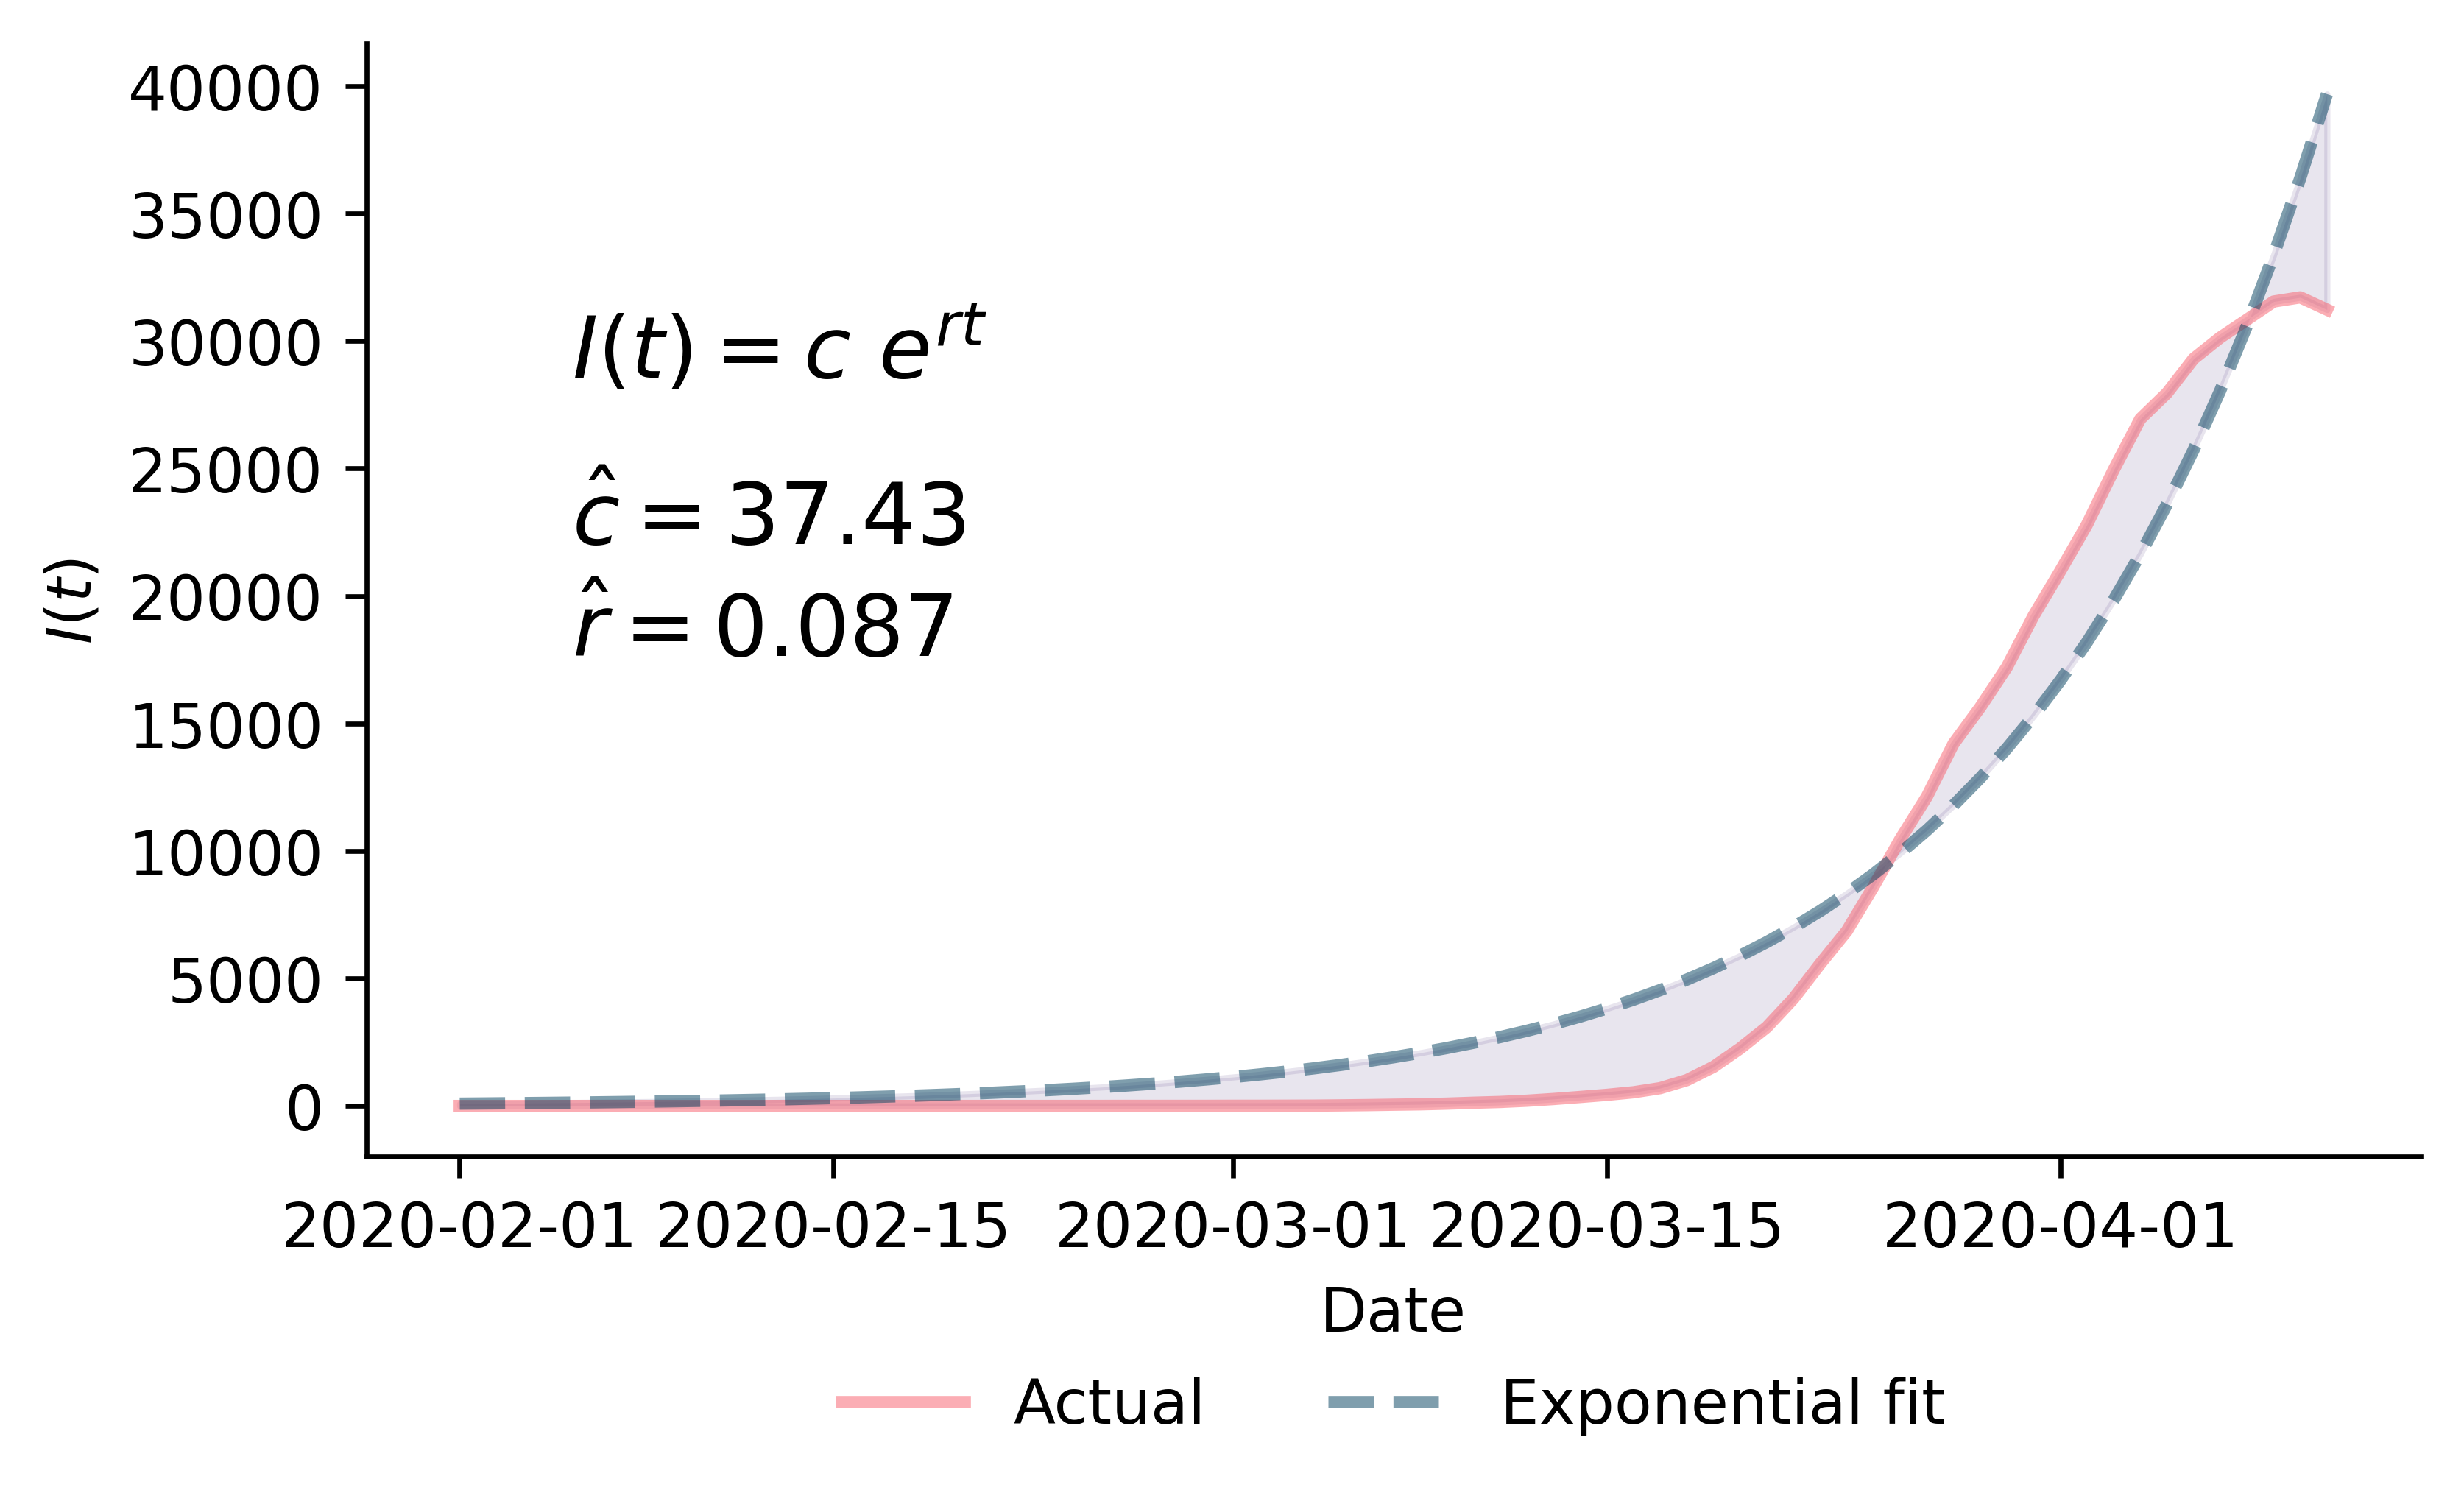

In [14]:
fig = plt.figure(facecolor="w", figsize=(6, 4), dpi=600)
ax = fig.add_subplot(111, axisbelow=True)

ax.plot(pd.to_datetime(data.date), data.cases, alpha=0.5, lw=2, color=COLORS["I"], label="Actual")
ax.plot(pd.to_datetime(data.date), popt[0] * np.exp(popt[1] * data.index), alpha=0.5, lw=2, color=COLORS["D"], linestyle="dashed", label="Exponential fit")

ax.fill_between(pd.to_datetime(data.date), data.cases, popt[0] * np.exp(popt[1] * data.index), color=COLORS["X"], alpha=0.15)

ax.set_xlabel("Date")
ax.set_ylabel("$I(t)$")
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

ax.annotate("$I(t) = c \ e^{rt}$", (0.1, 0.7), xycoords="axes fraction", fontsize=14)
ax.annotate("$\\hat{c} = 37.43$", (0.1, 0.55), xycoords="axes fraction", fontsize=14)
ax.annotate("$\\hat{r} = 0.087$", (0.1, 0.45), xycoords="axes fraction", fontsize=14)

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

fig.subplots_adjust(bottom=0.25)
plt.legend(title='', bbox_to_anchor=(0.5, -0.3), loc="lower center", ncol=3, frameon=False)

plt.savefig("exponential_fit.pdf")

In [8]:
popt[0], popt[1]

In [9]:
mu, sigma, t, blamda = sympy.symbols("mu sigma t lambda")

In [10]:
mgf_normal = E ** (t * mu + (sigma ** 2 * t ** 2)/2)

In [11]:
1/mgf_normal.subs({"t": -1 * popt[1],
                  "mu": 5,
                  "sigma": 1.15})